In [1]:
import numpy as np
import pandas as pd

apt_trading = pd.read_excel(
    "./아파트(매매)_실거래가_20221122103658.xlsx" ,
    skiprows=16 , # 16줄 설명줄 제거
    thousands="," , # 숫자사이 , 제거
)
apt_trading.head() # 한글이 잘나오나?

C:\Users\younghwankim\anaconda3-22-10\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구
4,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,102.32,202204,1,369000,13,2020.0,개포로 264,NaN,중개거래,"서울 강남구, 서울 양천구"


In [2]:
# df 구조 확인
apt_trading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13411 entries, 0 to 13410
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       13411 non-null  object 
 1   번지        13407 non-null  object 
 2   본번        13409 non-null  float64
 3   부번        13409 non-null  float64
 4   단지명       13411 non-null  object 
 5   전용면적(㎡)   13411 non-null  float64
 6   계약년월      13411 non-null  int64  
 7   계약일       13411 non-null  int64  
 8   거래금액(만원)  13411 non-null  int64  
 9   층         13411 non-null  int64  
 10  건축년도      13409 non-null  float64
 11  도로명       13411 non-null  object 
 12  해제사유발생일   594 non-null    float64
 13  거래유형      13411 non-null  object 
 14  중개사소재지    13411 non-null  object 
dtypes: float64(5), int64(4), object(6)
memory usage: 1.5+ MB


In [6]:
# 시군구 -> 구, 동 추출 칼럼 저장
apt_trading["gu"] = apt_trading["시군구"].str.split().str[1]
apt_trading["dong"] = apt_trading["시군구"].str.split().str[2]
apt_trading.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,gu,dong
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동
4,서울특별시 강남구 개포동,1282,1282.0,0.0,개포래미안포레스트,102.32,202204,1,369000,13,2020.0,개포로 264,NaN,중개거래,"서울 강남구, 서울 양천구",강남구,개포동


In [8]:
# 칼럼삭제
# apt_trading = apt_trading.drop(columns=["번지","본번","부번"]) # 삭제된 복사본 반환
apt_trading.drop(columns=["번지","본번","부번"], inplace=True) #원본 삭제
apt_trading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13411 entries, 0 to 13410
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시군구       13411 non-null  object 
 1   단지명       13411 non-null  object 
 2   전용면적(㎡)   13411 non-null  float64
 3   계약년월      13411 non-null  int64  
 4   계약일       13411 non-null  int64  
 5   거래금액(만원)  13411 non-null  int64  
 6   층         13411 non-null  int64  
 7   건축년도      13409 non-null  float64
 8   도로명       13411 non-null  object 
 9   해제사유발생일   594 non-null    float64
 10  거래유형      13411 non-null  object 
 11  중개사소재지    13411 non-null  object 
 12  gu        13411 non-null  object 
 13  dong      13411 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 1.4+ MB


In [9]:
# 계약년월 -> 계약년, 계약월
apt_trading["계약년"]  = apt_trading["계약년월"] // 100
apt_trading["계약월"]  = apt_trading["계약년월"] % 100

In [10]:
# 전용면적(m2) -> 전용면적
apt_trading.rename(columns={"전용면적(㎡)":"전용면적"}, inplace=True)

In [11]:
# 전용면적 -> 평
apt_trading["pyung"] = apt_trading["전용면적"] / 3.03

In [13]:
# 평 -> 평형 : 연속형 데이터 -> 범주형으로 변환. 구간별 통계 가능
apt_trading["pyung_type"] =  pd.cut(
    apt_trading["pyung"] ,  #대상데이터
    bins = [ 0, 10,20,30,40,50,200 ] , #구간 데이터
    labels = ["10평미만","10평대","20평대","30평대","40평대","50평이상"] , #구간별 이름 정의
    right=False , #우측 경계값의 좌측 구간에 포함 여부
)

In [16]:
# 해제사유발생일 -> 존재 -> 거래취소 -> 제외
apt_trading["해제사유발생일"].notnull().sum() # 거래취소건수
apt_trading_ok = apt_trading[ 
    apt_trading["해제사유발생일"].isnull() 
] #정상거래

,시군구,단지명,전용면적,계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,gu,dong,계약년,계약월,pyung,pyung_type
0,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,2021,12,26.392739,20평대
1,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,2022,4,26.392739,20평대
2,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,2022,4,26.392739,20평대
3,서울특별시 강남구 개포동,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,2022,5,26.392739,20평대
4,서울특별시 강남구 개포동,개포래미안포레스트,102.32,202204,1,369000,13,2020.0,개포로 264,NaN,중개거래,"서울 강남구, 서울 양천구",강남구,개포동,2022,4,33.768977,30평대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13406,서울특별시 중랑구 중화동,한신아파트(103~109),59.76,202207,20,74000,3,1997.0,동일로 752,NaN,중개거래,서울 중랑구,중랑구,중화동,2022,7,19.722772,10평대
13407,서울특별시 중랑구 중화동,한신아파트(103~109),84.03,202207,27,91500,12,1997.0,동일로 752,NaN,중개거래,서울 중랑구,중랑구,중화동,2022,7,27.732673,20평대
13408,서울특별시 중랑구 중화동,한영(101),84.69,202111,4,50000,2,2003.0,동일로144길 74,NaN,중개거래,"서울 송파구, 서울 중랑구",중랑구,중화동,2021,11,27.950495,20평대
13409,서울특별시 중랑구 중화동,한영(101),84.69,202204,9,49900,7,2003.0,동일로144길 74,NaN,중개거래,서울 중랑구,중랑구,중화동,2022,4,27.950495,20평대


In [25]:
# 강남3구
bidx = apt_trading["gu"].isin(["강남구","서초구","송파구"])
강남3구 = apt_trading[ bidx ]  #["gu"].unique()
강남3구외 = apt_trading[ ~bidx ]  #["gu"].unique()

In [26]:
# 거래평균
강남3구["거래금액(만원)"].mean(), 강남3구외["거래금액(만원)"].mean(), 

(197983.02508503402, 80932.49977393978)

In [36]:
# 구별 거래금액 평균
# apt_trading.groupby("gu")[ "거래금액(만원)" ].mean() # 시리즈
# apt_trading.groupby("gu")[ ["거래금액(만원)"] ].mean() # 데이터프레임
# apt_trading.groupby("gu")[ "거래금액(만원)" ].mean().sort_values() # 시리즈
apt_trading.groupby("gu")[ ["거래금액(만원)"] ].mean().sort_values("거래금액(만원)") # 데이터프레임


,거래금액(만원)
gu,
중랑구,51445.709571
구로구,52449.599323
금천구,52773.853821
도봉구,58135.915179
강북구,60449.587156
관악구,63765.185950
강서구,65640.332398
은평구,67253.895865
노원구,67929.741062


# 시각화

In [39]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

(0.0, 12.0)

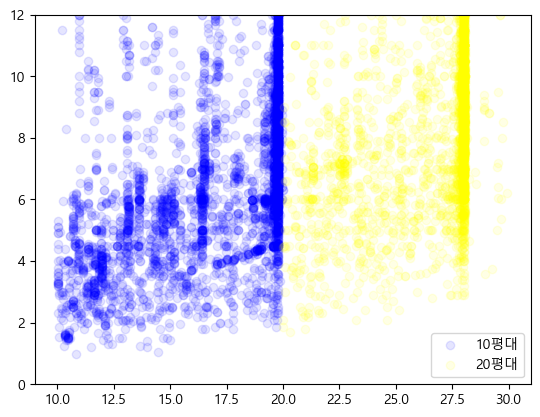

In [53]:
#10평대, 20평대
apt10 = apt_trading[ apt_trading["pyung_type"]=="10평대" ]
apt20 = apt_trading[ apt_trading["pyung_type"]=="20평대" ]

plt.scatter(
    apt10["pyung"],
    apt10["거래금액(만원)"] / 10000,
    alpha = 0.1, # 점의 투명도
    color="blue",
    label = "10평대"
)
plt.scatter(
    apt20["pyung"],
    apt20["거래금액(만원)"] / 10000,
    alpha = 0.1, # 점의 투명도
    color="yellow",
    label = "20평대"
)
plt.legend() # 범례표시. 등록된 label 속성값들을 모아 출력
plt.ylim(0, 12)


<AxesSubplot:xlabel='gu'>

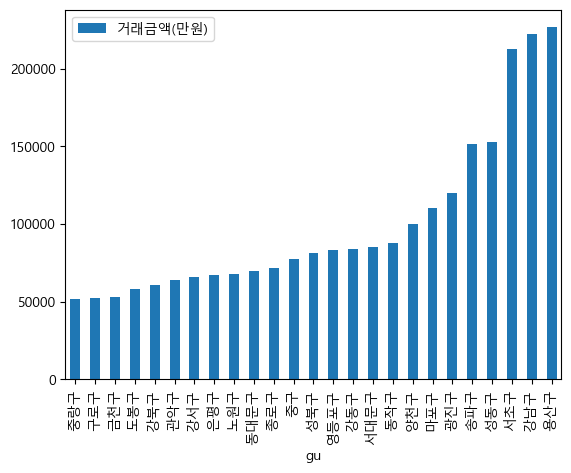

In [57]:
# 데이터 프레임의 시각화
거래금액평균 = apt_trading.groupby("gu")[ ["거래금액(만원)"] ].mean().sort_values("거래금액(만원)") # 데이터프레임
거래금액평균.plot.bar()

# 데이터프레임 시각화

<AxesSubplot:xlabel='계약월'>

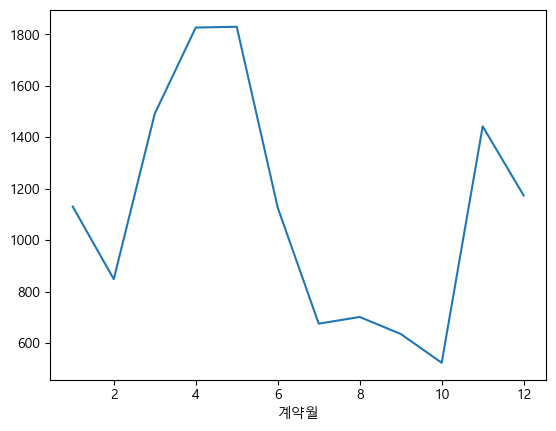

In [59]:
# line 선그래프
# x축은 인덱스가 표시
# 월별 거래량
apt_trading.groupby("계약월")["gu"].count().plot.line()

<AxesSubplot:xlabel='계약월'>

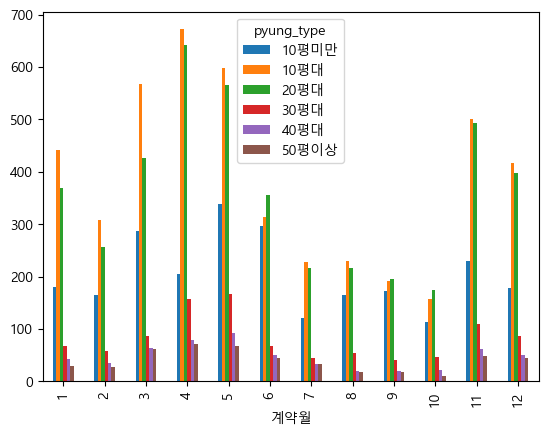

In [63]:
# 데이터프레임으로 line 그릴때 주의사항 - 칼럼당 1줄씩 그려짐
# 월별 평형별 거래량
apt_trading.pivot_table(
    values="gu",
    index="계약월",
    columns="pyung_type",
    aggfunc="count"
) .plot.bar() #.plot.line()

count    13411.000000
mean        22.455265
std         12.875176
min          3.739274
25%         13.636964
50%         19.795380
75%         28.029703
max         99.495050
Name: pyung, dtype: float64


<AxesSubplot:ylabel='Frequency'>

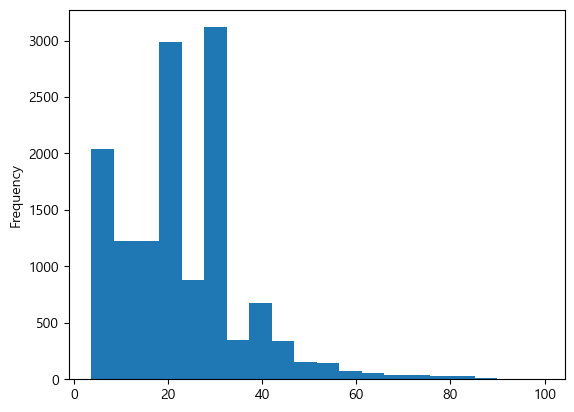

In [69]:
# 히스토그램 - 빈도표
print(apt_trading["pyung"].describe())
apt_trading["pyung"].plot.hist(bins=20)

<AxesSubplot:>

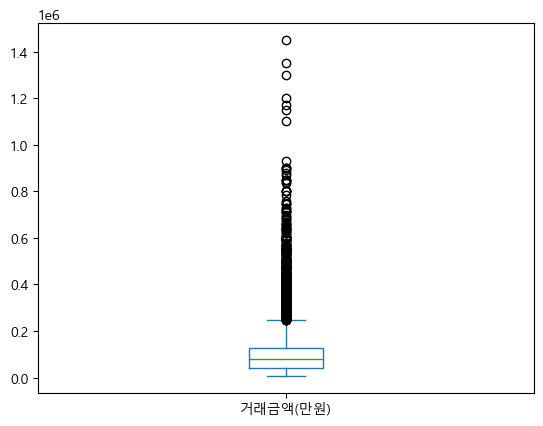

In [72]:
# 박스플랏
apt_trading["거래금액(만원)"].plot.box()

<AxesSubplot:xlabel='gu', ylabel='거래금액(만원)'>

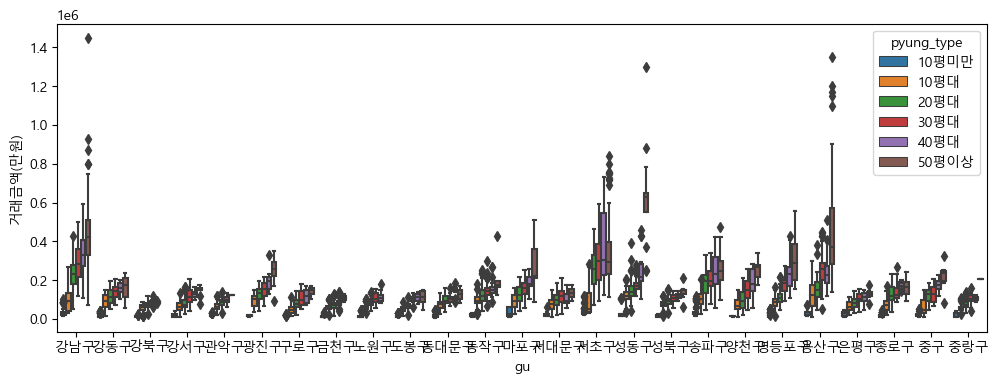

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4)) #인치

sns.boxplot(
    data = apt_trading,
    x = "gu", # 그룹할 기준칼럼
    y = "거래금액(만원)",
    hue="pyung_type", # 서브그룹칼럼
)

<AxesSubplot:ylabel='pyung_type'>

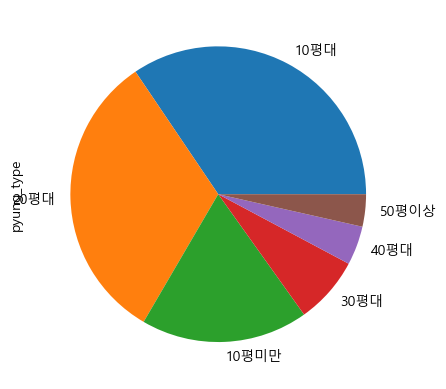

In [77]:
# 파이그래프
# 평형별 거래량
apt_trading["pyung_type"].value_counts().plot.pie()

<AxesSubplot:xlabel='pyung', ylabel='거래금액(만원)'>

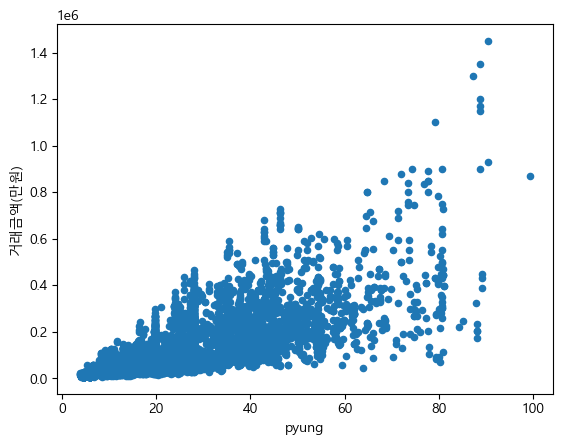

In [78]:
# 산점도,산포도
apt_trading.plot.scatter(
    x = "pyung",
    y = "거래금액(만원)"
)

<AxesSubplot:xlabel='계약월', ylabel='gu'>

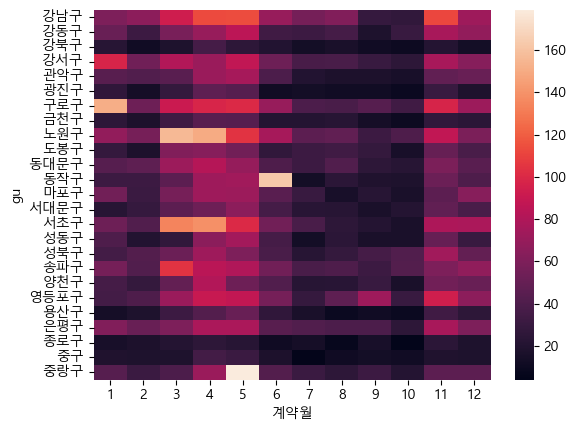

In [82]:
# seaborn히트맵
# 값의 고저를 색온도로 표현
# 구별 월별 거래량
구별월별거래량 = apt_trading.pivot_table(
    values="pyung",
    index="gu",
    columns="계약월",
    aggfunc="count"
)
sns.heatmap( 구별월별거래량 )